### This is the code in class that worked

In [1]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install datetime
# !pip install mplfinance
# !pip install pandas_datareader

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # styling dates


import datetime as dt
import mplfinance as mpf #matplotlib finance

In [3]:
import yfinance as yf


amzn_data  = yf.download("AMZN", start='2020-01-01', end='2021-01-01', progress=False)

In [4]:
amzn_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000
2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000
2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000
2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000
2020-01-08,94.902000,95.550003,94.321999,94.598503,94.598503,70160000
...,...,...,...,...,...,...
2020-12-24,159.695007,160.100006,158.449997,158.634506,158.634506,29038000
2020-12-28,159.699997,165.199997,158.634506,164.197998,164.197998,113736000
2020-12-29,165.496994,167.532501,164.061005,166.100006,166.100006,97458000


In [5]:
amzn_data2 = amzn_data


amzn_data2['daily_return'] = (amzn_data2['Adj Close'] / amzn_data2['Adj Close'].shift(1)) - 1

**Exercise 1: Copy the dataframe amzn_data into a new dataframe so that amzn_data is unaffected by changes made to the new dataframe**

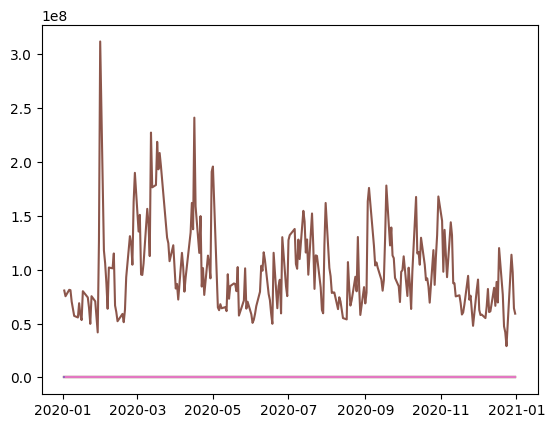

In [6]:
plt.plot(amzn_data2)

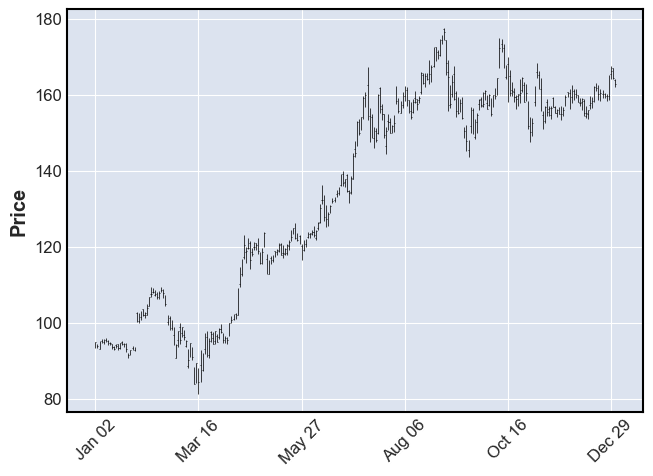

In [7]:
mpf.plot(amzn_data2)

**Exercise 2: See if you can adjust the function get_returned_defined_time shown in class to work with yfinance**

It does not have to take in the same arguments it only has to accomplish the goal of returning the amount.

In [8]:
def get_return_defined_time(ticker, syear, smonth, sday, eyear, emonth, eday):
    # Download historical data using yfinance
    df = yf.download(ticker, start=f"{syear}-{smonth}-{sday}", end=f"{eyear}-{emonth}-{eday}")
    
    # Calculate daily returns
    df['Daily Return'] = df['Close'].pct_change()
    
    # Create string representations for the dates
    start = pd.to_datetime(f"{syear}-{smonth}-{sday}")
    end = pd.to_datetime(f"{eyear}-{emonth}-{eday}")
    
    # Filter the DataFrame based on the given date range
    mask = (df.index >= start) & (df.index <= end)
    
    # Get the mean of the daily returns
    daily_ret = df.loc[mask, 'Daily Return'].mean()
    
    # Get the number of days between the two dates
    days = df.loc[mask].shape[0]
    
    # Return the total return between the two dates
    return (days * daily_ret)

tot_ret = get_return_defined_time('AMZN', 2020, 1, 1, 2021, 1, 1)
print("Total Return :", tot_ret)

# Total Return : 0.6166402116980415


[*********************100%%**********************]  1 of 1 completed

Total Return : 0.6166402116980423


**Exercise 3: See if you can adjust the function mplfinance plot to work with yfinance. Essentially write your own function to accomplish the same goal**

In [9]:
# Receives a ticker and the date range for which to plot
def mplfinance_plot(ticker, chart_type, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"

    try:
        # For Windows
        # df = pd.read_csv('C:/Users/derek/Documents/Python Finance/Python/' + ticker + '.csv',index_col=0,parse_dates=True)
        # For MacOS
        df = pd.read_csv(ticker + '.csv',index_col=0,parse_dates=True)
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:

        # Set data.index as DatetimeIndex
        df.index = pd.DatetimeIndex(df['Date'])

        # Define to only use data between provided dates
        df_sub = df.loc[start:end]

        # A candlestick chart demonstrates the daily open, high, low and closing price of a stock
        mpf.plot(df_sub,type='candle')

        # Plot price changes
        mpf.plot(df_sub,type='line')

        # Moving averages provide trend information (Average of previous 4 observations)
        mpf.plot(df_sub,type='ohlc',mav=4)

        # Define a built in style
        s = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 8})
        # Pass in the defined style to the whole canvas
        fig = mpf.figure(figsize=(12, 8), style=s)
        # Candle stick chart subplot
        ax = fig.add_subplot(2,1,1)
        # Volume chart subplot
        av = fig.add_subplot(2,1,2, sharex=ax)

        # You can plot multiple MAVs, volume, non-trading days
        mpf.plot(df_sub,type=chart_type, mav=(3,5,7), ax=ax, volume=av, show_nontrading=True)

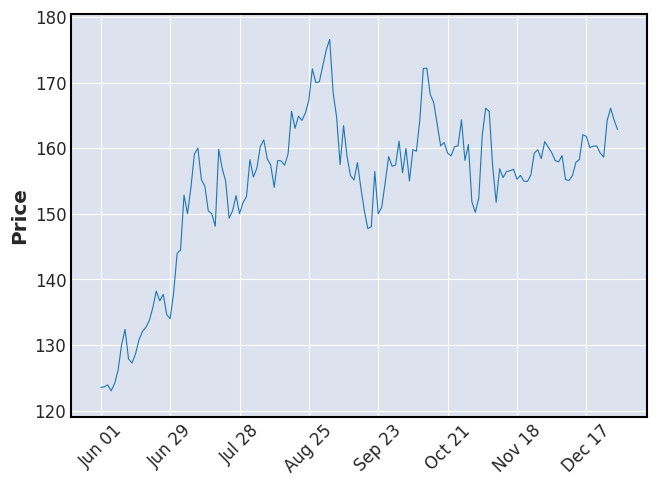

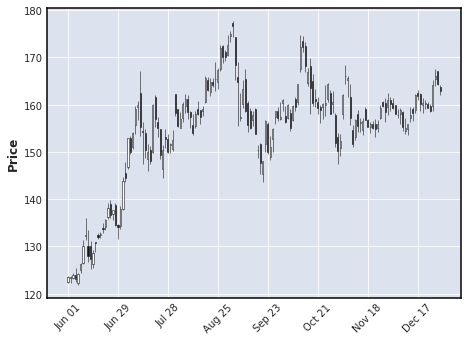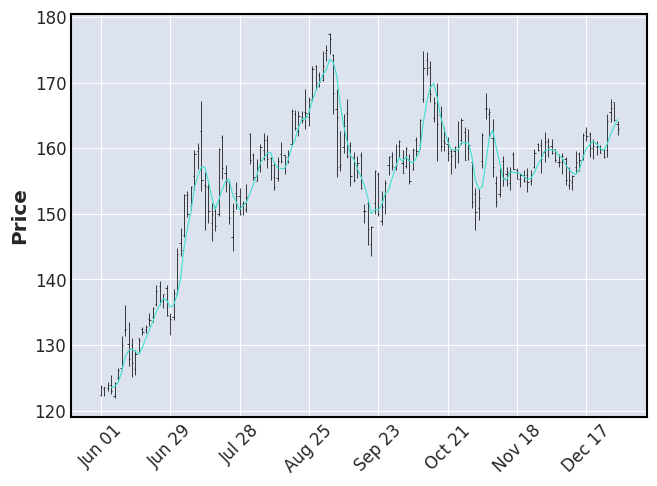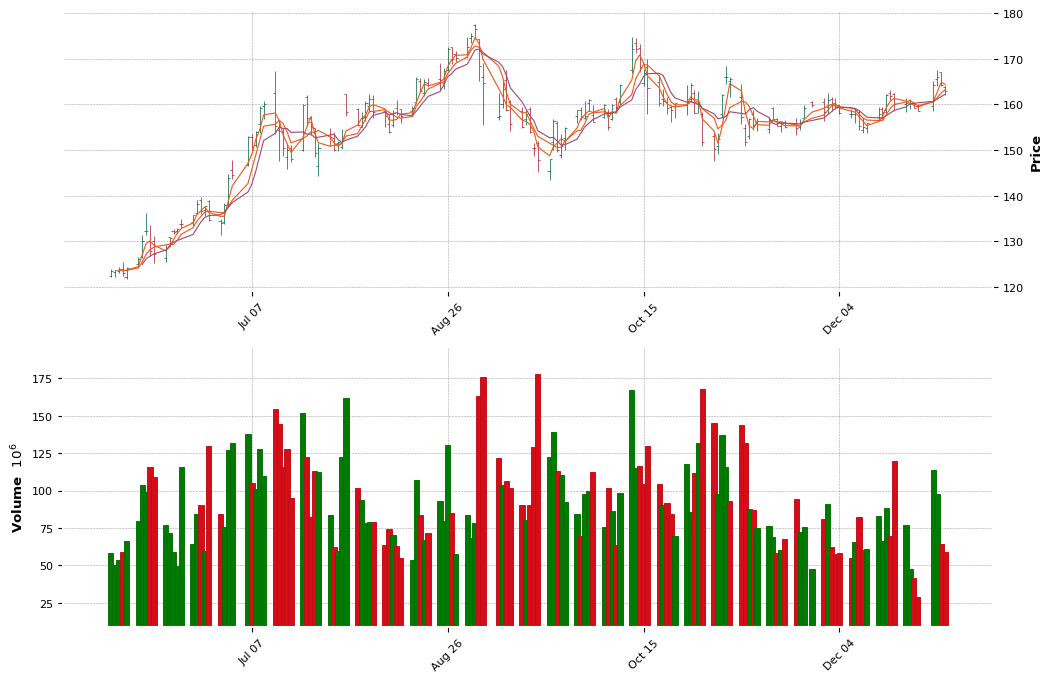

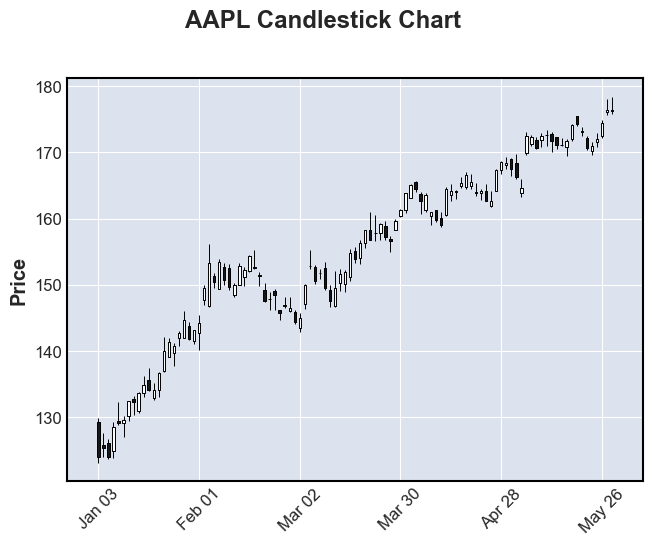

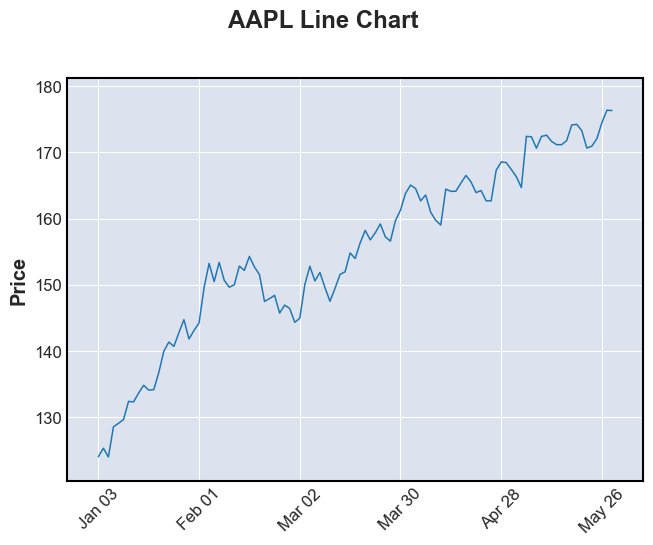

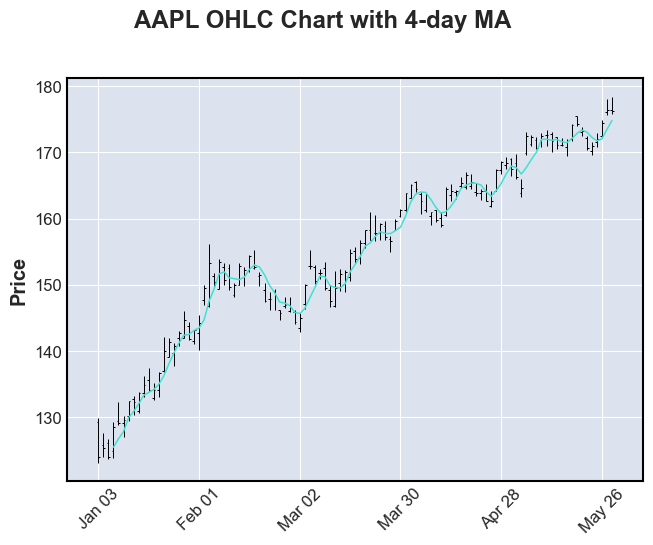

An error occurred: 'NoneType' object has no attribute 'suptitle'


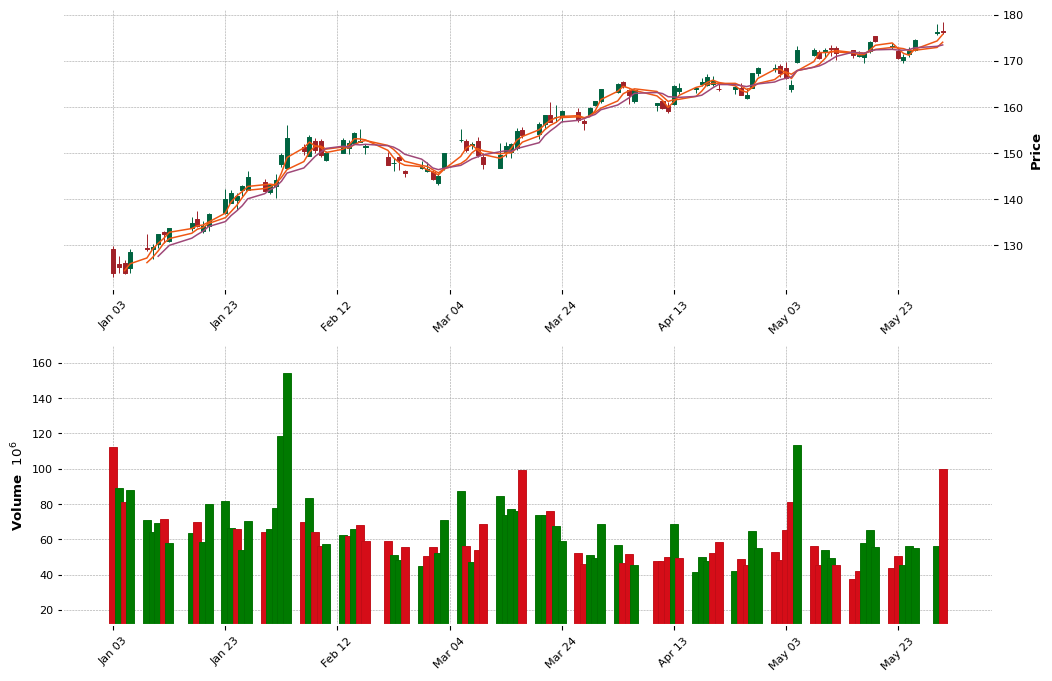

In [15]:
def mplfinance_plot(ticker, chart_type, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"

    try:
        # Fetch data using yfinance
        stock = yf.Ticker(ticker)
        df = stock.history(start=start, end=end)

        # Ensure the index is a DatetimeIndex
        df.index = pd.to_datetime(df.index)

        # A candlestick chart demonstrates the daily open, high, low and closing price of a stock
        mpf.plot(df, type='candle', title=f"{ticker} Candlestick Chart")

        # Plot price changes
        mpf.plot(df, type='line', title=f"{ticker} Line Chart")

        # Moving averages provide trend information (Average of previous 4 observations)
        mpf.plot(df, type='ohlc', mav=4, title=f"{ticker} OHLC Chart with 4-day MA")

        # Define a built in style
        s = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 8})
        
        # Pass in the defined style to the whole canvas
        fig = mpf.figure(figsize=(12, 8), style=s)
        
        # Candle stick chart subplot
        ax = fig.add_subplot(2,1,1)
        
        # Volume chart subplot
        av = fig.add_subplot(2,1,2, sharex=ax)

        # You can plot multiple MAVs, volume, non-trading days
        mpf.plot(df, type=chart_type, mav=(3,5,7), ax=ax, volume=av, show_nontrading=True,
                 title=f"{ticker} {chart_type.capitalize()} Chart with Volume")

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage:
mplfinance_plot('AAPL', 'candle', 2023, 1, 1, 2023, 6, 1)

**Exercise 4: See if you can write a function to download multiple stocks using yfinance from a particular date to a particular date and save them to a dataframe. You can save them to a csv but you will have to determine the code for doing so as the one provided will likely not work**

In [11]:
# starting point

def download_multiple_stocks_to_dataframe(syear, smonth, sday, eyear, emonth, eday, *tickers):
    all_data = {}
    
    for ticker in tickers:
        start = f"{syear}-{smonth}-{sday}"
        end = f"{eyear}-{emonth}-{eday}"
        
        # Download historical data using yfinance
        df = yf.download(ticker, start=start, end=end)
        
        if df.empty:
            print(f"No data available for {ticker}")
            continue
        
        # Add data to dictionary
        df['Ticker'] = ticker
        all_data[ticker] = df
    
    # Concatenate all DataFrames
    combined_df = pd.concat(all_data.values(), keys=all_data.keys())
    
    # Save to CSV file
    combined_df.to_csv('combined_stocks.csv')
    print("Combined data saved to combined_stocks.csv")

# usage
download_multiple_stocks_to_dataframe(2020, 1, 1, 2021, 1, 1, 'AAPL', 'MSFT', 'GOOGL')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Combined data saved to combined_stocks.csv


**Exercise 4.5: If you can do the above merge those into one datafram and see if you can plot them all at the same time**

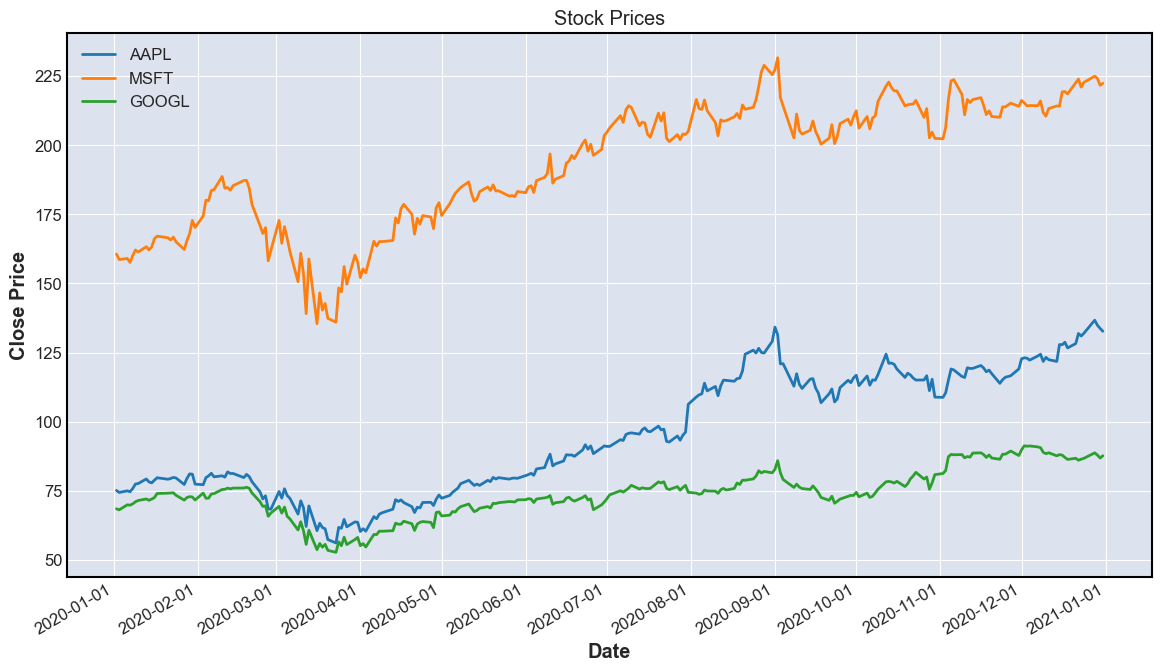

In [12]:
# This function plots data
def plot_combined_data(df):
    plt.figure(figsize=(14, 8))
    
    # Plot data for each ticker
    for ticker in df.index.get_level_values(0).unique():
        ticker_data = df.loc[ticker]
        plt.plot(ticker_data.index.get_level_values('Date'), ticker_data['Close'], label=ticker)
    
    plt.title('Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    
    # Improve date formatting on x-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gcf().autofmt_xdate()
    
    plt.show()

# Load combined data from CSV
combined_df = pd.read_csv('combined_stocks.csv', index_col=[0, 1], parse_dates=[1])
combined_df.index.names = ['Ticker', 'Date']

# Usage to plot it on the data
plot_combined_data(combined_df)
